# Nivel 1
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que te llame la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import plotly.express as px


In [31]:
operaciones = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1234",
  database="operaciones"
)
print(operaciones)
mycursor = operaciones.cursor()
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)


('companies',)
('credit_card',)
('estado_tarjeta',)
('products',)
('tiquets',)
('tiquets_juntos',)
('transactions',)
('users',)


## Ejercicio 1: Una variable numérica.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3244607580.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(products, operaciones)


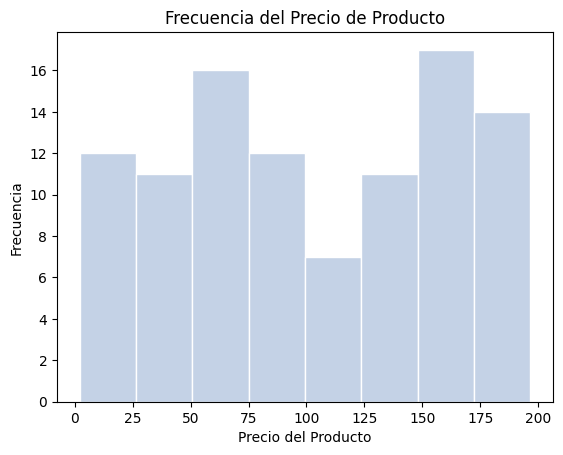

In [32]:
# Selección de datos
products = 'SELECT * FROM products'
df_products = pd.read_sql(products, operaciones)

# Crear el gráfico de barras
sns.histplot(df_products['price'], color='lightsteelblue', edgecolor='white')
plt.xlabel('Precio del Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del Precio de Producto')
plt.show()

### Discursión.

##### El gráfico utilizado para representar una variable numérica es el Histograma. En este gráfico, representamos la frecuencia del precio del producto. El rango del precio (en el eje de las x) es de 20 unidades. y la frecuencia del precio se representa en intervalos de 2 unidades. El valor máxinmo de la frecuencia del precio del producto es 14. El intervalo de 100 a 125, la frecuencia del precio es de 5 unidades, bastante por debajo de los demás.
##### Según el resultado del gráfico, no parece que haya un patrón de venta según el precio del producto. Tanto se venden productos baratos, como productos más caros. De hecho, el rango con más presencia tiene uno de los más altos.

## Ejercicio 2: Dos variables numéricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3921133016.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)


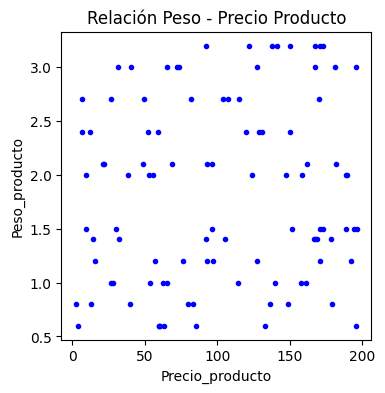

In [33]:
# Selección de datos
productos = 'SELECT * FROM products'
df_productos = pd.read_sql(productos, operaciones)

# Dibujar gráfico de dispersion
plt.figure(figsize=(4, 4))
plt.plot( 'price', 'weight', data=df_productos, linestyle='none', marker='.', color = 'blue')
plt.xlabel('Precio_producto')
plt.ylabel('Peso_producto')
plt.title('Relación Peso - Precio Producto')
plt.savefig('Nivel1_ejercicio2prova.jpeg')
plt.show()

### Discursión.

##### El gráfico utilizado para representar dos variables numéricas, es un Scatter Plot ó gráfico de dispersión, corresponde a una representación gráfica de la relación entre dos variables cuantitativas. Se representan como una serie de puntos. En este caso, las variables seleccionadas son PRECIO DE PRODUCTO y PESO DEL PRODUCTO.
##### En  el eje de las x, se representa el precio de producto con valores de 0 a 200 unidades, con marcas cada 50 unidades. El peso de producto se distribuye entre 0.5 y  3,5 Kg, y se representa a intervalos de 0.5 unidades.
##### Por la distribución de los puntos en la gráfica estas dos variables no tienen relación alguna. No siguen ningún patrón.

## Ejercicio 3: Una variable categórica.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\1802051394.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\1802051394.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(products, operaciones)


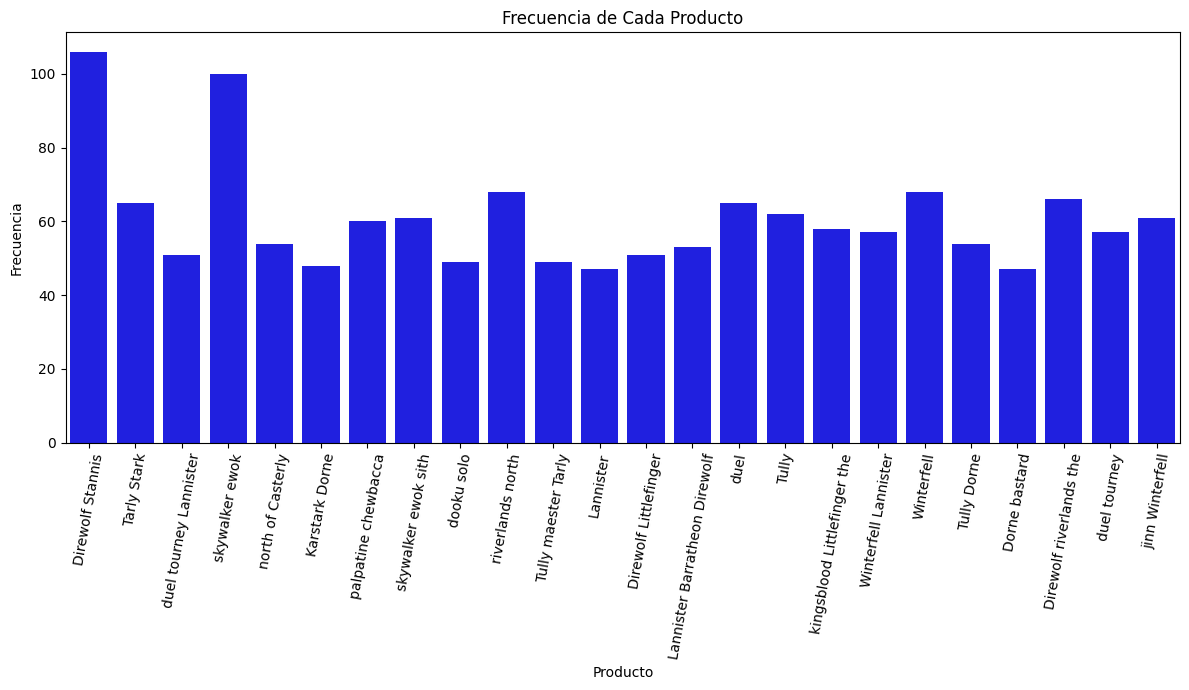

In [34]:
tiquets = 'SELECT * from tiquets;'
products = 'SELECT * FROM products'
df_tiquets = pd.read_sql(tiquets, operaciones) 
df_products = pd.read_sql(products, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(str)
df_products['id'] = df_products['id'].astype(str)
df_products_tiquets = pd.merge(df_products, df_tiquets, left_on='id', right_on='product', how='inner')

# Crear el gráfico de barras
plt.figure(figsize = (12,7))
sns.countplot(data=df_products_tiquets, x='product_name', color = 'Blue')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Producto')
plt.xticks(rotation=80)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten

### Discursión.

##### El gráfico escogido para representar una variable categórica es un gráfico de barras, donde representamos la frecuencia de cada producto vendido.
##### En el eje de las x, se representan los nombres de los productos, y en el eje de las y, la frecuencia de cada producto.
##### De la representación, podemos ver que hay productos con más demanda que otros. Los más vendidos son: Direwolf Stannis y duel tourney Lannister, seguidos por Riverlands North y Winterfell. El resto de productos tienen una frecuencia muy similar.

## Ejercicio 4: Una variable categórica y una numérica.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\328050794.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql(companies, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\328050794.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_precio = pd.read_sql(precio, operaciones)


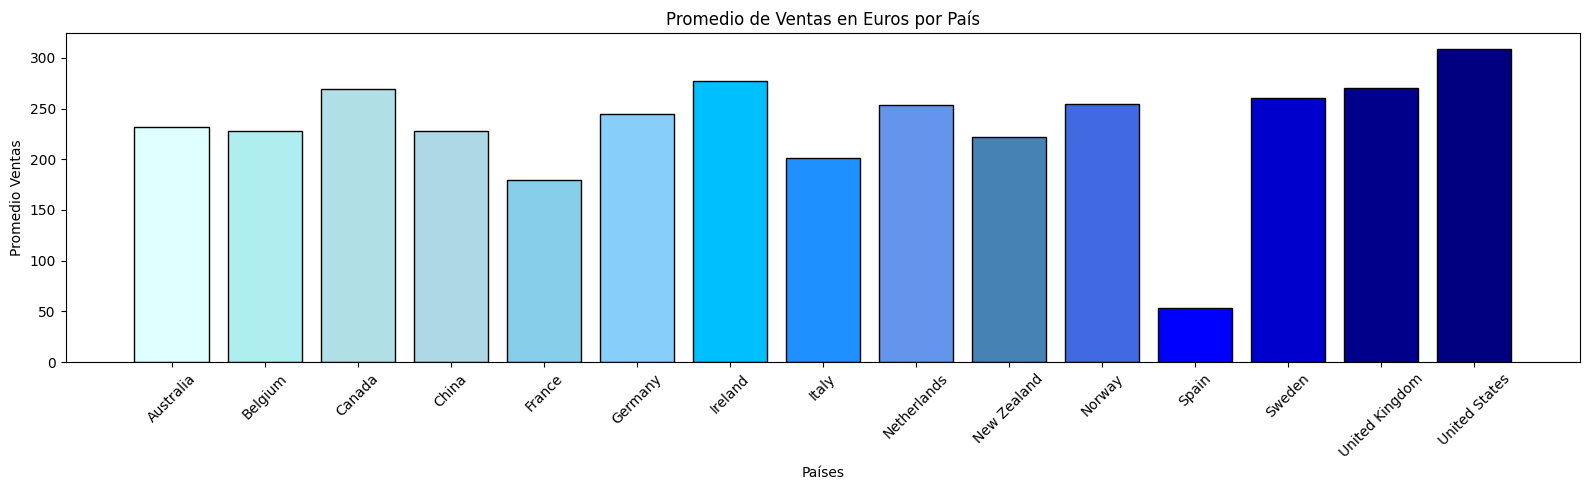

In [35]:
# Selección de datos
precio = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;' 
df_pais = pd.read_sql(companies, operaciones)
df_precio = pd.read_sql(precio, operaciones)

#Renombramos la variable bussiness_id por company_id
df_precio = df_precio.rename(columns={"bussiness_id": "company_id"})
df_datos4 = df_precio.join(df_pais.set_index('company_id'), on = 'company_id')
df_datos4 = df_datos4[['country', 'amount']].dropna()
df_datos_agrupa4 = df_datos4.groupby('country', as_index=False)['amount'].mean().round(2)

#definir una paleta de colores
colores4 = ["#E0FFFF", "#AFEEEE", "#B0E0E6", "#ADD8E6", "#87CEEB", 
            "#87CEFA", "#00BFFF", "#1E90FF", "#6495ED", "#4682B4", 
            "#4169E1", "#0000FF", "#0000CD", "#00008B", "#000080"]

# Crear el gráfico de barras
plt.figure(figsize = (16,5))
plt.bar(df_datos_agrupa4['country'], df_datos_agrupa4['amount'],
        color= colores4, edgecolor='black')
plt.xlabel('Países')
plt.ylabel('Promedio Ventas')
plt.title('Promedio de Ventas en Euros por País')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()


### Discursión.

##### Para representar una variable categórica y otra numérica, hemos utilizado un gráfico de barras. En este caso representamos los paises de empresas, y el promedio del amount por país.
##### De la representación del promedio del amount por paises, vemos son valores bastante homogeneos casi todos están por encima de los 200€. De la represntación llama la atención España, por tener un valor promedio significativamente más bajo que los demás.


## Ejercicio 5: Dos variables categóricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3300626162.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_declined = pd.read_sql(declined, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3300626162.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql(pais, operaciones)


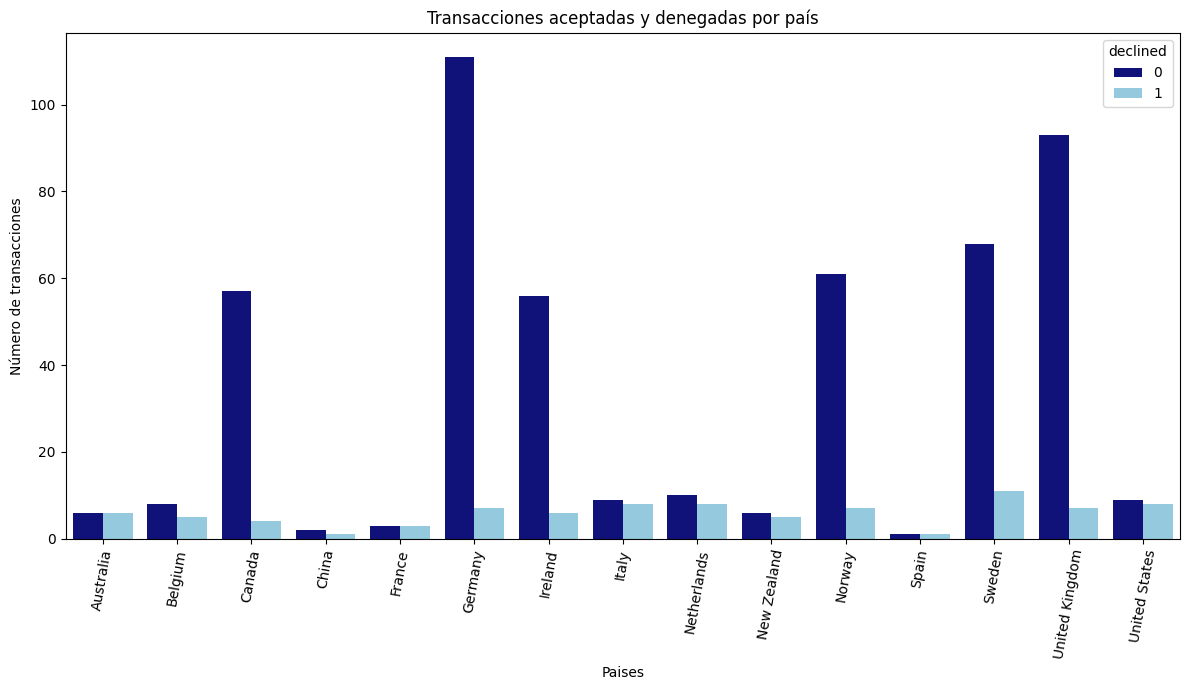

In [36]:
# Selección de datos
declined = 'SELECT * FROM transactions;'
pais = 'SELECT * FROM companies;'
df_declined = pd.read_sql(declined, operaciones)
df_pais = pd.read_sql(pais, operaciones)
df_declined = df_declined.rename(columns={"bussiness_id": "company_id"})
df_pais_declined = pd.merge(df_pais, df_declined, on = 'company_id')
df_pais_declined = df_pais_declined.sort_values('country', ascending=True)
df_pais_declined['declined'] = df_pais_declined['declined'].astype(str)
colores = ["#00008B", "#87CEEB"]

plt.figure(figsize = (12,7))
sns.countplot(data=df_pais_declined, x='country',  hue='declined', palette = colores)
plt.xlabel('Paises')
plt.ylabel('Número de transacciones')
plt.title('Transacciones aceptadas y denegadas por país')
plt.xticks(rotation=80)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()

### Discursión.

##### El gráfico utilizado para representar dos variables categóricas es el gráfico de barras. Las variables escogidas son country y el tipo de transacciones, aceptadas y denegadas. En el eje de las x, representamos los paises de las empresas, y en el eje de las y, representamos el recuento de las transacciones, divididas en dos grupos: acptadas y denegadas.
##### De la representación gráfica, podemos ver que hay 6 paises con las máximsa transacciones, repsecto a las transacciones totales, el número de transacciones denegadas es pequeño. Por el contrario, el resto de paises tienen valores muy próximos de transacciones aceptadas y denegadas.

## Ejercicio 6: Tres variables.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3571178199.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3571178199.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(companies, operaciones)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Belgium'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Ireland'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'New Zealand'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

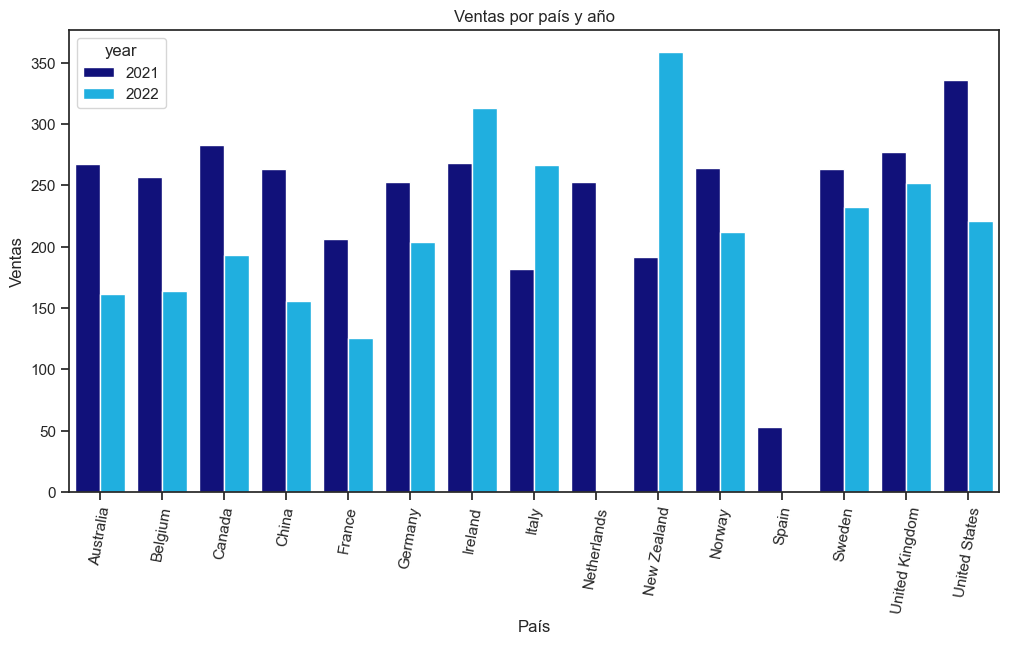

In [57]:
# Selección de datos
transactions = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;'
df_transactions = pd.read_sql(transactions, operaciones)
df_companies = pd.read_sql(companies, operaciones)
df_transactions = df_transactions.rename(columns={"bussiness_id": "company_id"})
df_datos =  pd.merge(df_companies, df_transactions, on = 'company_id')
df_datos['year'] = df_datos['dia_hora'].dt.year
# Aplicar la función a la columna 'Country'
colores = ['#00008B', '#00BFFF']

# Agrupar por país y año, y calcular el amount promedio
df_datos_agrupa6 = df_datos.groupby(['country', 'year'])['amount'].mean().reset_index().round(2)

# crear gráfico de barras
plt.figure(figsize = (12,6))
sns.barplot(x='country', y='amount', hue ='year', data = df_datos_agrupa6, palette = colores)
plt.xlabel('País')
plt.ylabel('Ventas')
plt.title('Ventas por país y año')
plt.xticks(rotation=80)  # Rotar las etiquetas del eje X si es necesario

## Discursión.

##### El gráfico utilizado para representar tres variables, hemos escogido un gráfico de barras. Las variables categóricas a representar son country y año. La variable cuantitativa es el promedio del amount.
##### De la representación, podemos observar que para el año 2021, el promedio del amount está por 250 €, con excepción de Francia, Italia, Nueva Zelanda y España. Para el 2022, el promedio del amount va muy bien. De los paises que no alcanzaron el valor objetivo, son sorprendentes los valores de Italia y Nueva Zelanda, que han superado sus ventas significativamente. 
##### Los paises donde no remontamos, son España y Holanda, donde no hay presencia en el año 2022. Hay que estudiar que pasa en estos paises. Y ver si vale la pena seguir con la distribución de nuestros productos en estos paises.
##### Por otro lado, se deben analizar los valores para el segundo trimestre del año, y ver la evolución.

### Ejercicio 7: Graficar un Pairplot.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\74226134.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\74226134.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\74226134.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)


<Figure size 1200x600 with 0 Axes>

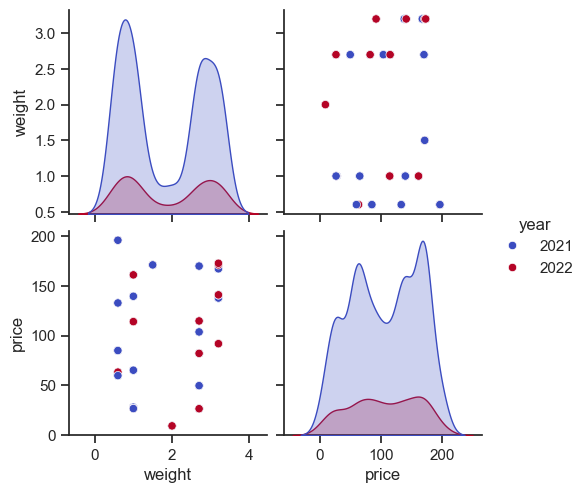

In [62]:
# Selección de datos
productos = 'SELECT * FROM products;'
transactions = 'SELECT * FROM transactions;'
tiquets = 'SELECT * FROM tiquets'
df_productos = pd.read_sql(productos, operaciones)
df_transacciones = pd.read_sql(transactions, operaciones)
df_tiquets = pd.read_sql(tiquets, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(int)
df_productos['id'] = df_productos['id'].astype(int)
df_product_tiquets = df_tiquets.join(df_productos.set_index('id'), on = 'product')
df_final = df_transacciones.join(df_product_tiquets.set_index('id'), on = "id")
df_final['year'] = df_final['dia_hora'].dt.year
df_data7 = df_final[['weight', 'price', 'year']]

# crear gráfico
plt.figure(figsize = (12,6))
sns.pairplot(df_data7, hue = 'year', palette = 'coolwarm')


## Discursión.

##### El pairplot es una función de representación que crea una cuadrícula de gráficos de dispersión e histogramas para todas las combinaciones posibles de variables numéricas de un DataFrame. En este caso, las variables numéricas utilizadas son precio de producto y peso de producto, clasificados por año. Las variables no tienen una relación entre si, no siguen ningún patrón.
##### De la correlación del weight, vemos que hay dos picos, uno en el 1.5 unidades aprox y en 3.5 unidades aprox. Sigue ese patrón para los dos años.
##### En el caso del precio, vemos que hay dos picos también, uno en 80 unidades aprox y en 190 unidades aprox. Podemos apreciarlo en los dos años.


# NIVEL 2

### Ejercicio 1: Correlación de todas las variables numéricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\550430681.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\550430681.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\550430681.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)


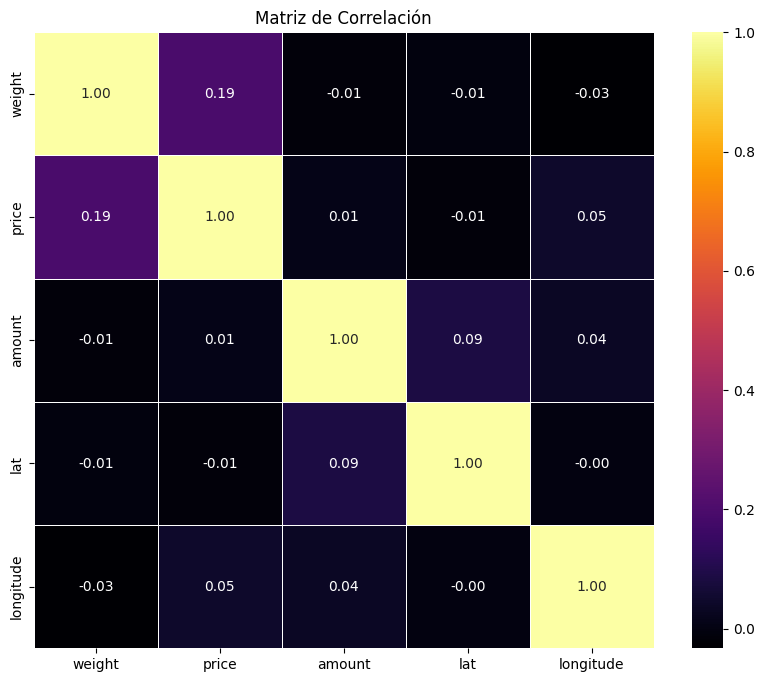

In [39]:
# Selección de datos
productos = 'SELECT * FROM products;'
transactions = 'SELECT * FROM transactions;'
tiquets = 'SELECT * FROM tiquets'
df_productos = pd.read_sql(productos, operaciones)
df_transacciones = pd.read_sql(transactions, operaciones)
df_tiquets = pd.read_sql(tiquets, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(int)
df_productos['id'] = df_productos['id'].astype(int)
df_product_tiquets = df_tiquets.join(df_productos.set_index('id'), on = 'product')
df_final = df_transacciones.join(df_product_tiquets.set_index('id'), on = "id")
df_data = df_final[['weight', 'price', 'amount', 'lat', 'longitude']]

# Calcular la matriz de correlación de todas las variables numéricas
corr_matrix = df_data.corr(method='pearson')
data21 = pd.DataFrame(corr_matrix)

# crear gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Discursión.

##### En este ejercicio se crea una matriz de correlación siguiendo la distribución de Pearson, donde representamos todas las variables numéricas existentes en nuestro dataframe. En la matriz representada, podemos ver en amarillo la diagonal, donde se representa la correlación de una variable con ella misma, que lógicamente es 1.
##### Para el resto de combinaciones de las variables de dos en dos, podemos ver que está muy cerca del cero. No hay ninguna relación real entre las variables representadas.
##### Por último, se ha representado la latitud y longitud, como variables numéricas, aunque cada una de estas medidas necesita de la otra. No tienen sentido por separado. Ya que las latitud y longitud, son las dos coordenadas que determinan un punto en el espacio.

## Ejercicio 2: Implementa un jointplot.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\3018131795.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)


<Figure size 1200x1200 with 0 Axes>

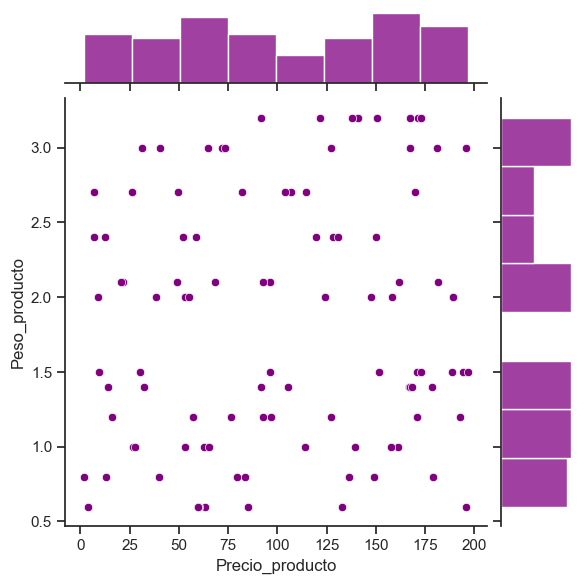

In [44]:
# Selección de datos
productos = 'SELECT * FROM products'
df_productos = pd.read_sql(productos, operaciones)

# Dibujar gráfico de dispersion
plt.figure(figsize=(12, 12))
sns.jointplot(x='price', y='weight', data=df_productos, kind='scatter', color = 'purple')
plt.xlabel('Precio_producto')
plt.ylabel('Peso_producto')
plt.show()

## Discursión.

##### Un jointplot es una función de visualización de seaborn. Esta función permite crear gráficos que combinan distribuciones marginales y conjuntas de dos variables, proporcionando así una vista completa de las relaciones entre las variables. Se representa en el eje de las x el precio del producto con valores de 0 a 200 e intervalo de 25 unidades. En el eje de las y, representamos el peso del producto con valores de 0.5 y 3.5 Kg con intervalo de 0.5. Observamos que para el intervalo de 1.5 a 2.0 no hay frecuencia. No existen productos don este
##### Las variables numéricas escogidas para representar son Precio y Peso de producto. La distribución de los puntos es aleatoria. NO define nungún patrón. 


# NIVEL 3

### Ejercicio 1: Implementa un violinplot combinado con otro tipo de gráfico.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\227764245.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\227764245.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='amount', data=df_transactions, bw=0.5, inner = 'quart', palette = 'pastel')
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\227764245.py:7: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='year', y='am

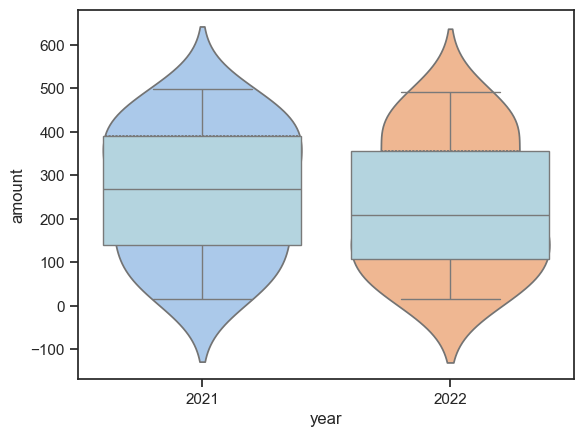

In [49]:
# Selección de datos
transactions = 'SELECT * FROM transactions;'
df_transactions = pd.read_sql(transactions, operaciones)
df_transactions['year']= df_transactions['dia_hora'].dt.year

# Crear un violin plot
sns.violinplot(x='year', y='amount', data=df_transactions, bw=0.5, inner = 'quart', palette = 'pastel')
sns.boxplot(x='year', y='amount', data=df_transactions, showcaps=True, color = 'lightBlue')
plt.show()

#### Discursión.

##### En el gráfico de Violin, se representa la distribución del amount en los diferentes años. Los gráficos tienen una forma invertida. Para el año 2021, predominan los valores de amount más altos. A lo largo del 2022, los valores de amount se concentran en valores bajos. Esto es debido a que para el año 2022, sólo contamos con datos de los tres primeros meses.








### Ejercicio 2: Genera un FacetGrid para visualizar múltiples aspectos de los datos simultániamente.

C:\Users\34622\AppData\Local\Temp\ipykernel_6568\2536197532.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_6568\2536197532.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(companies, operaciones)


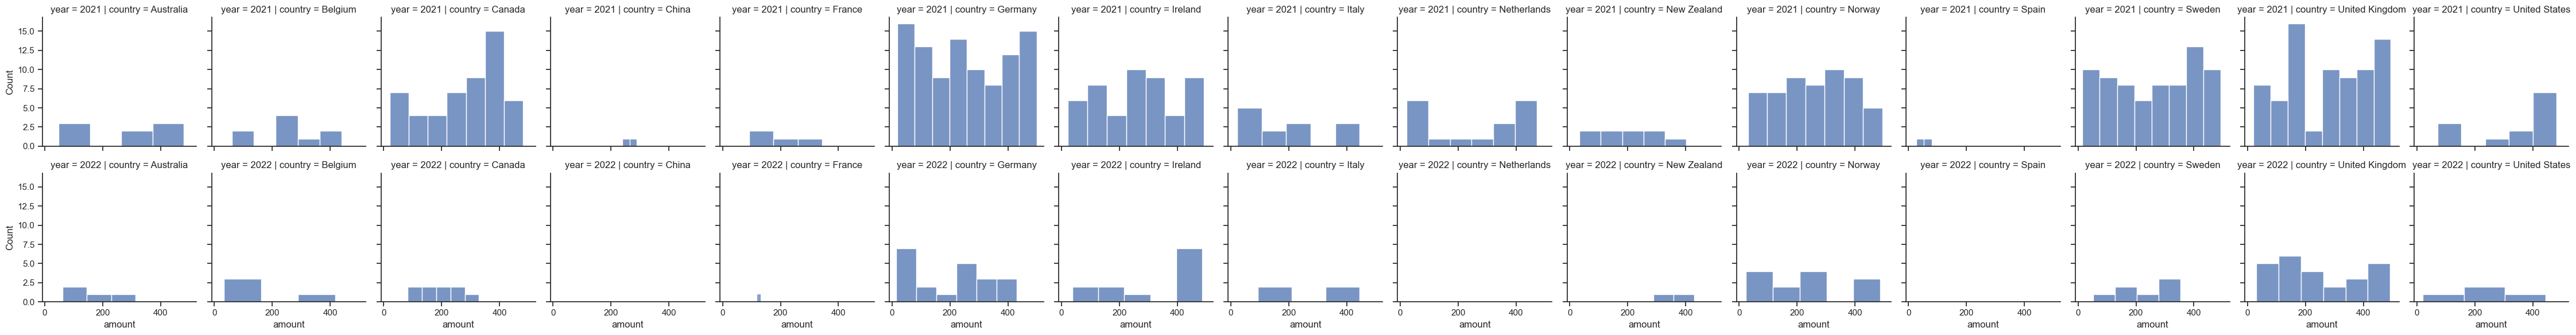

In [56]:
# Selección de datos
transactions = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;'
df_transactions = pd.read_sql(transactions, operaciones)
df_companies = pd.read_sql(companies, operaciones)
df_transactions = df_transactions.rename(columns={"bussiness_id": "company_id"})
df_datos32 =  pd.merge(df_companies, df_transactions, on = 'company_id')
df_datos32['year'] = df_datos32['dia_hora'].dt.year.astype(str)
df_datos_finales = df_datos32[['year', 'country', 'amount']].sort_values('country')

# creación de un gráfico Facetgrid
sns.set(style="ticks")
g = sns.FacetGrid(df_datos_finales, row = "year", col="country")
g.map(sns.histplot, "amount")


### Discursión.

##### En el gráfico FacetGrid, hemos representado la frecuencia del amount por country y año. Obtenemos una serie de gráficos que nos permite comparar la variación de la frecuencia del amount para cada country en los dos años, y entre los diferentes country.
##### Del análisis de los gráficos, podemos ver que hay unos paises que son importantes en el valor de ventas. Estos paises son: Alemania, Noruega, Reino Unido, Suecia, Irlanda y Canada. Se ven muy representados en 2021. En 2022, siguen teniendo peso, Alemania, Noruega y Reino Unido. Las ventas se hacen principlamente en estos paises.
